In [77]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from utils.conn_data import load_pickle
from portfolio_tools.Diagnostics import Diagnostics
from functionals.Functionals import Functionals

plt.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 0.8

In [78]:
# parameters
train = True
strategy_name = "etfstsm"
diag = Diagnostics()

strategy_name = f"training_{strategy_name}_fixed" if train else strategy_name

# paths
outputs_path = os.path.join(os.getcwd(), "data", "outputs")
dirs = sorted(os.listdir(os.path.join(outputs_path, strategy_name)))

print(dirs)

['252', '30', '90']


In [79]:
dir = "90"

optmization_train = load_pickle(os.path.join(outputs_path, strategy_name, dir, "train_opt_results.pickle"))
portfolio_train = load_pickle(os.path.join(outputs_path, strategy_name, dir, "train_portfolio_results.pickle"))
portfolio_test = load_pickle(os.path.join(outputs_path, strategy_name, dir, "test_portfolio_results.pickle"))

Text(0, 0.5, 'Rolling Sharpe Ratio')

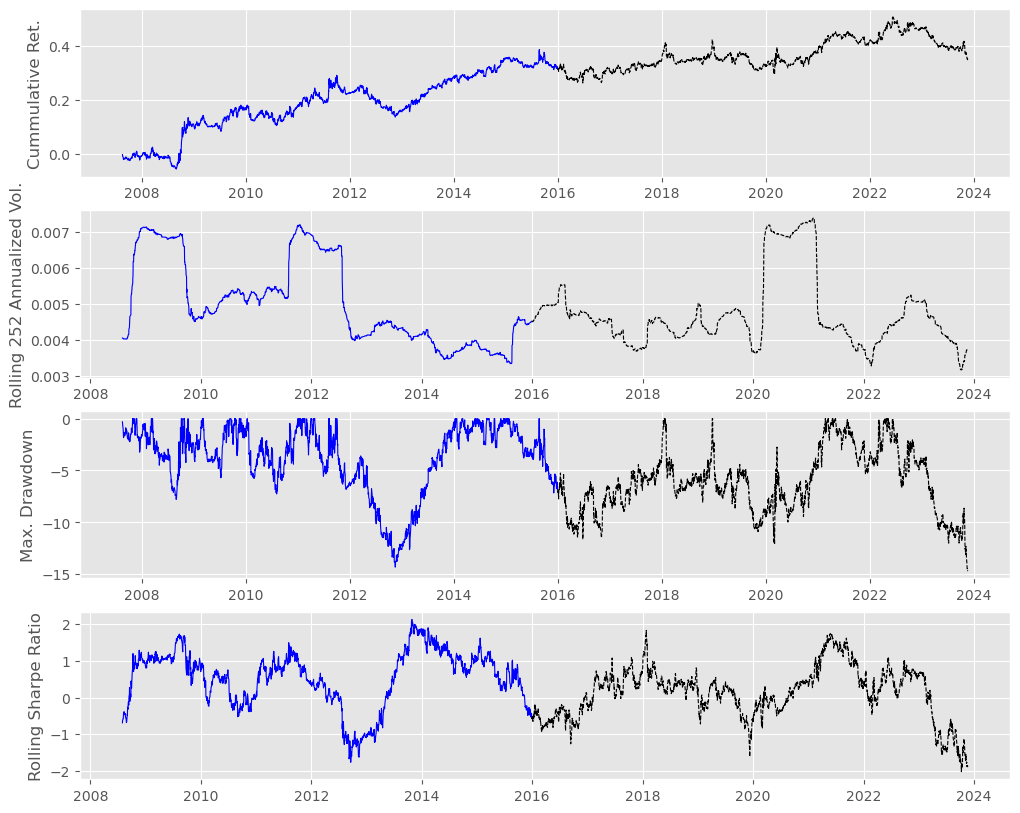

In [88]:
train_daily_rets = portfolio_train['agg_scaled_portfolio_returns']
test_daily_rets = portfolio_test['agg_scaled_portfolio_returns']

train_end_date = train_daily_rets.index[-1] - pd.DateOffset(days=1)

daily_rets = pd.concat([train_daily_rets, test_daily_rets])
daily_cumm_rets = daily_rets.cumsum()

# vol
rolling_vol = daily_rets.rolling(window=252).std().dropna()

# max dd
cummulative_portfolio_returns = np.exp(daily_cumm_rets.dropna())
rolling_max = cummulative_portfolio_returns.cummax()
rolling_max.iloc[0] = 1.0
max_dd = (cummulative_portfolio_returns - rolling_max) / rolling_max * 100

# sharpe
rolling_sharpe = (daily_rets.rolling(window=252).mean() / daily_rets.rolling(window=252).std()) * np.sqrt(252)

# Create a figure with two subplots (axes), one on top of the other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))  # Adjust figsize as needed

# cummulative returns
# ax1.set_title(f"Daily Cumulative Returns and Volatiltiy", size=10)
ax1.plot(daily_cumm_rets.loc[:train_end_date].index, daily_cumm_rets.loc[:train_end_date].portfolio_returns,  color='blue', linestyle='-', label='Train')
ax1.plot(daily_cumm_rets.loc[train_end_date:].index, daily_cumm_rets.loc[train_end_date:].portfolio_returns,  color='black', linestyle='--', label='Test')
ax1.set_ylabel("Cummulative Ret.")

# volatiltiy
ax2.plot(rolling_vol.loc[:train_end_date].index, rolling_vol.loc[:train_end_date].portfolio_returns,  color='blue', linestyle='-', label='Train')
ax2.plot(rolling_vol.loc[train_end_date:].index, rolling_vol.loc[train_end_date:].portfolio_returns,  color='black', linestyle='--', label='Test')
ax2.set_ylabel("Rolling 252 Annualized Vol.")

# max drawdown
ax3.plot(max_dd.loc[:train_end_date].index, max_dd.loc[:train_end_date].portfolio_returns,  color='blue', linestyle='-', label='Train')
ax3.plot(max_dd.loc[train_end_date:].index, max_dd.loc[train_end_date:].portfolio_returns,  color='black', linestyle='--', label='Test')
ax3.set_ylabel("Max. Drawdown")

# sharpe
ax4.plot(rolling_sharpe.loc[:train_end_date].index, rolling_sharpe.loc[:train_end_date].portfolio_returns,  color='blue', linestyle='-', label='Train')
ax4.plot(rolling_sharpe.loc[train_end_date:].index, rolling_sharpe.loc[train_end_date:].portfolio_returns,  color='black', linestyle='--', label='Test')
ax4.set_ylabel("Rolling Sharpe Ratio")